#### Author：马肖
#### E-Mail：maxiaoscut@aliyun.com
#### GitHub：https://github.com/Albertsr

### 1 偏态系数

- 若偏态系数绝对值大于1，称为高度偏态分布
- 若绝对值在【0.5,1】区间内，称为中等偏态分布,概率密度曲线右侧偏长
- 偏态系数小于0，称为左偏；否则，右偏

### 2 np.lopg1p或np.sqrt能降低数值型特征的偏度
StandardScaler,MinMaxScaler等标准化操作对偏度无影响

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white", color_codes=True)

import warnings 
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler,MinMaxScaler
dataset = load_boston()
feature_names = dataset.feature_names
X, y = load_boston(return_X_y=True)

In [2]:
df = pd.DataFrame(X, columns=feature_names)

scaler_1 = StandardScaler()
df_StandardScaled = scaler_1.fit_transform(df)
df_StandardScaled = pd.DataFrame(df_StandardScaled, columns=feature_names)

scaler_2 = MinMaxScaler()
df_MinMaxScaled = scaler_2.fit_transform(df)
df_MinMaxScaled = pd.DataFrame(df_MinMaxScaled, columns=feature_names)

df_lpg1p = df_MinMaxScaled.applymap(lambda x: np.log1p(x))
df_sqrt = df_MinMaxScaled.applymap(lambda x: np.sqrt(x))

In [3]:
skew_original = [df[i].skew() for i in feature_names]
skew_StandardScaled = [df[i].skew() for i in feature_names]
skew_MinMaxScaled = [df_MinMaxScaled[i].skew() for i in feature_names]
skew_logeded = [df_lpg1p[i].skew() for i in feature_names]
skew_sqrt = [df_sqrt[i].skew() for i in feature_names]

df_skew = pd.DataFrame({"skew_original":skew_original, "skew_StandardScaled":skew_StandardScaled, 
                        "skew_MinMaxScaled":skew_MinMaxScaled, "skew_logeded":skew_logeded,
                        "skew_sqrt":skew_sqrt}, index = feature_names)
df_skew.sort_index(inplace=True)


skew_sum = [abs(df_skew[i]).sum() for i in df_skew.columns]
df_skew.loc["SKEW_SUM"] = skew_sum
df_skew

# 标准化StandardScaler,MinMaxScaler等无法改变一列数据的偏度
# 对本数据集来说,np.sqrt()比np.lop1p()的效果稍好一点

,skew_original,skew_StandardScaled,skew_MinMaxScaled,skew_logeded,skew_sqrt
AGE,-0.598963,-0.598963,-0.598963,-0.806758,-1.055553
B,-2.890374,-2.890374,-2.890374,-3.084347,-3.366608
CHAS,3.405904,3.405904,3.405904,3.405904,3.405904
CRIM,5.223149,5.223149,5.223149,4.128753,2.014322
DIS,1.011781,1.011781,1.011781,0.734378,0.293500
INDUS,0.295022,0.295022,0.295022,0.123367,-0.121184
LSTAT,0.906460,0.906460,0.906460,0.578045,0.140307
NOX,0.729308,0.729308,0.729308,0.409697,0.037881
PTRATIO,-0.802325,-0.802325,-0.802325,-1.070027,-1.532034
RAD,1.004815,1.004815,1.004815,0.938857,0.637851


### 3 通过绘制直方图，直观地观察其偏度

#### 3.1 两个数据框的对比

In [4]:
def multi_dist_plot(df1, df2, col=3):
    row = int(np.ceil(df1.shape[1] / col))
    
    # sns.set(font_scale=1.2, style='ticks', palette='Set1') 
    f, axes = plt.subplots(row, col, figsize=(col*4, row*5))
    
    idx_list = []
    for i in range(row):
        for j in range(col):idx_list.append((i,j))
    
    for idx, val in enumerate(sorted(feature_names)):
        temp = idx_list[idx]
        sns.distplot(df1[val], bins=50, kde=True, color="g", ax=axes[temp[0],temp[1]])
        sns.distplot(df2[val], bins=50, kde=True, color="r", ax=axes[temp[0],temp[1]])
        
        skew1 = round(df1[val].skew(), 2)
        skew2 = round(df2[val].skew(), 2)
        
        axes[temp[0],temp[1]].set_title((val+" ' Skew : "+str(skew1)+" / "+str(skew2)),fontsize=13)
        axes[temp[0],temp[1]].set_xlabel('')
        sns.despine()

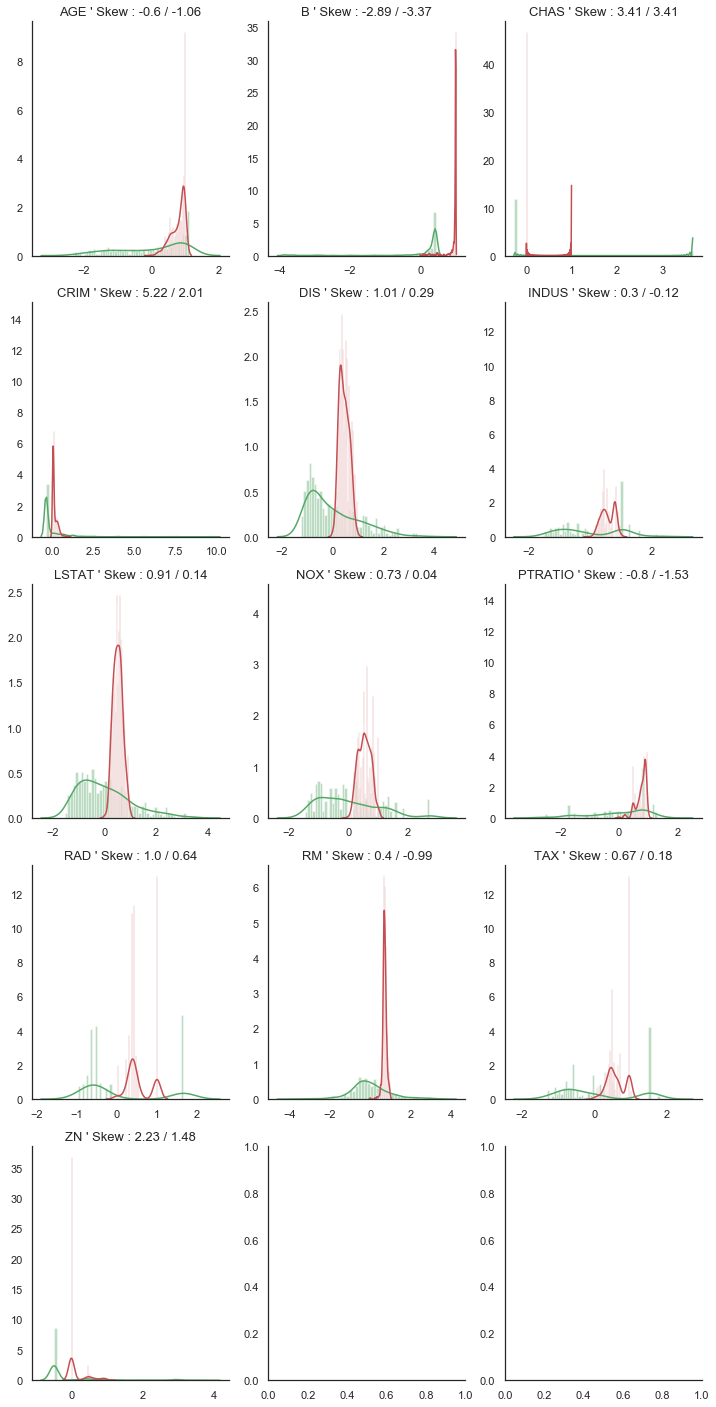

In [5]:
# 红色的曲线代表df_sqrt各列特征的直方图，相比绿色曲线更符合正态分布曲线
multi_dist_plot(df_StandardScaled, df_sqrt)

#### 3.2 单个数据框

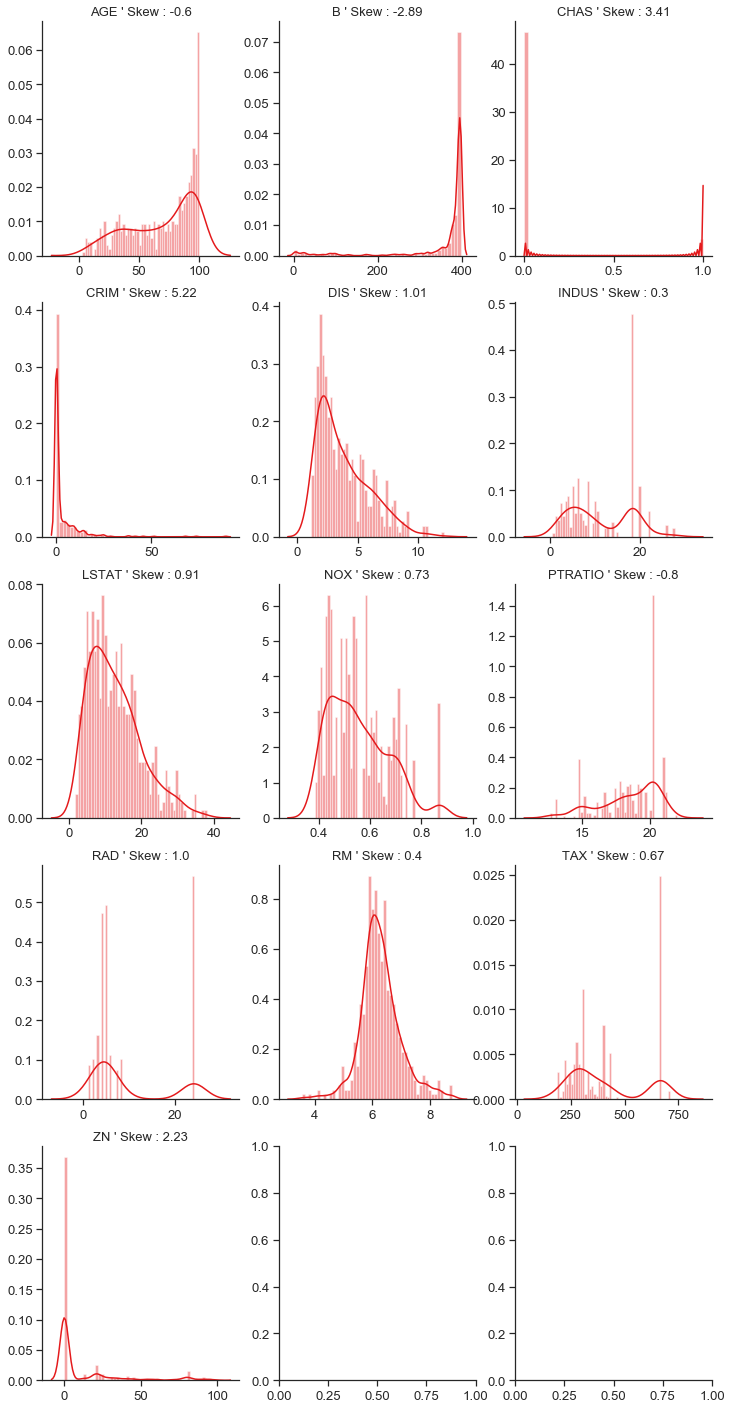

In [6]:
def single_dist_plot(df, col=3):
    row = int(np.ceil(df.shape[1] / col))  
    sns.set(font_scale=1.2, style='ticks', palette='Set1') 
    f, axes = plt.subplots(row, col, figsize=(col*4, row*5))
    
    idx_list = []
    for i in range(row):
        for j in range(col):idx_list.append((i,j))
            
    for idx, val in enumerate(sorted(feature_names)):
        temp = idx_list[idx]
        sns.distplot(df[val], bins=50, kde=True, ax=axes[temp[0],temp[1]])
        skew = round(df[val].skew(), 2)
        axes[temp[0],temp[1]].set_title((val+" ' Skew : "+str(skew)), fontsize=13)
        axes[temp[0],temp[1]].set_xlabel('')
        sns.despine()
          
single_dist_plot(df)

### 4 对性能的影响

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X, y = load_boston(return_X_y=True)

X_Scaled = scaler_2.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, random_state=0)

X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)

In [8]:
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

score = Ridge().fit(X_train_sqrt, y_train).score(X_test_sqrt, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.621
Test score: 0.669


In [9]:
score = RandomForestRegressor().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

score = RandomForestRegressor().fit(X_train_sqrt, y_train).score(X_test_sqrt, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.762
Test score: 0.801


#### log变换使得特征更趋于高斯分布，有助于提升线性模型性能

Test score: 0.609


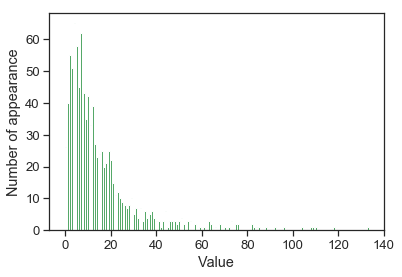

In [10]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='g')
plt.ylabel('Number of appearance')
plt.xlabel('Value')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.861


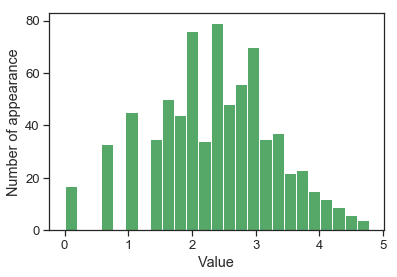

In [11]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

plt.hist(X_train_log[:, 0], bins=25, color='g')
plt.ylabel('Number of appearance')
plt.xlabel('Value')

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:.3f}'.format(score))